In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
training_data= pd.read_csv("twitter_training.csv")
validation_data= pd.read_csv("twitter_validation.csv")

In [3]:
print("Training Data Columns:", training_data.columns)
print("Validation Data Columns:", validation_data.columns)
print("\nTraining Data Types:", training_data.dtypes)
print("Validation Data Types:", validation_data.dtypes)

Training Data Columns: Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
Validation Data Columns: Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')

Training Data Types: 2401                                                      int64
Borderlands                                              object
Positive                                                 object
im getting on borderlands and i will murder you all ,    object
dtype: object
Validation Data Types: 3364                                                                                                                                                                                           

In [4]:
# Renaming the columns for the training dataset
training_data.columns = ['tweet_id', 'platform', 'sentiment', 'tweet_text']
# Renaming the columns for the validation dataset
validation_data.columns = ['tweet_id', 'platform', 'sentiment', 'tweet_text']

In [5]:
combined_data = pd.concat([training_data, validation_data])
combined_data.head()

,tweet_id,platform,sentiment,tweet_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


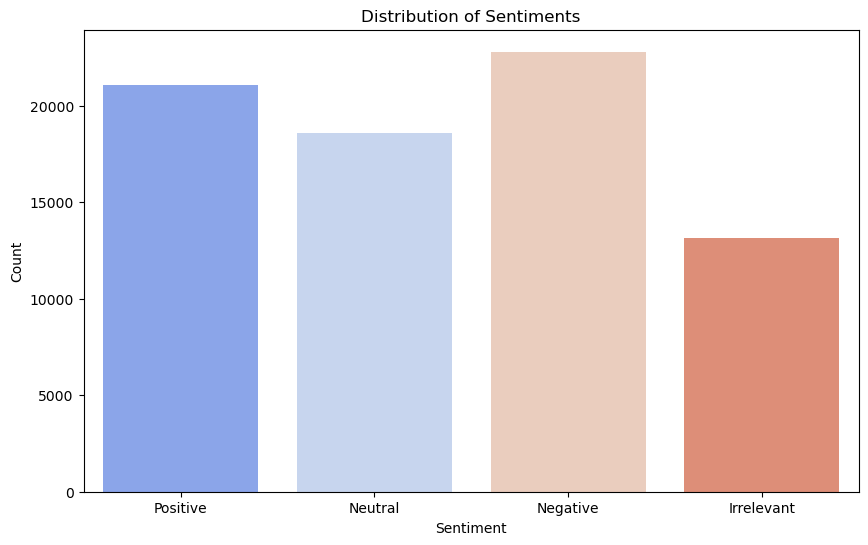

In [6]:
# Display the distribution of sentiments
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='sentiment', palette='coolwarm')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [7]:
# Generating mock dates for the tweets
combined_data['tweet_created'] = pd.date_range(start='2021-01-01', periods=len(combined_data), freq='H')

In [8]:
# Converting the 'tweet_created' column to datetime format
combined_data['tweet_created'] = pd.to_datetime(combined_data['tweet_created'])

# Setting the 'tweet_created' column as the index
combined_data.set_index('tweet_created', inplace=True)

# Resampling the data by month
monthly_sentiment = combined_data.resample('M')['sentiment'].value_counts().unstack().fillna(0)

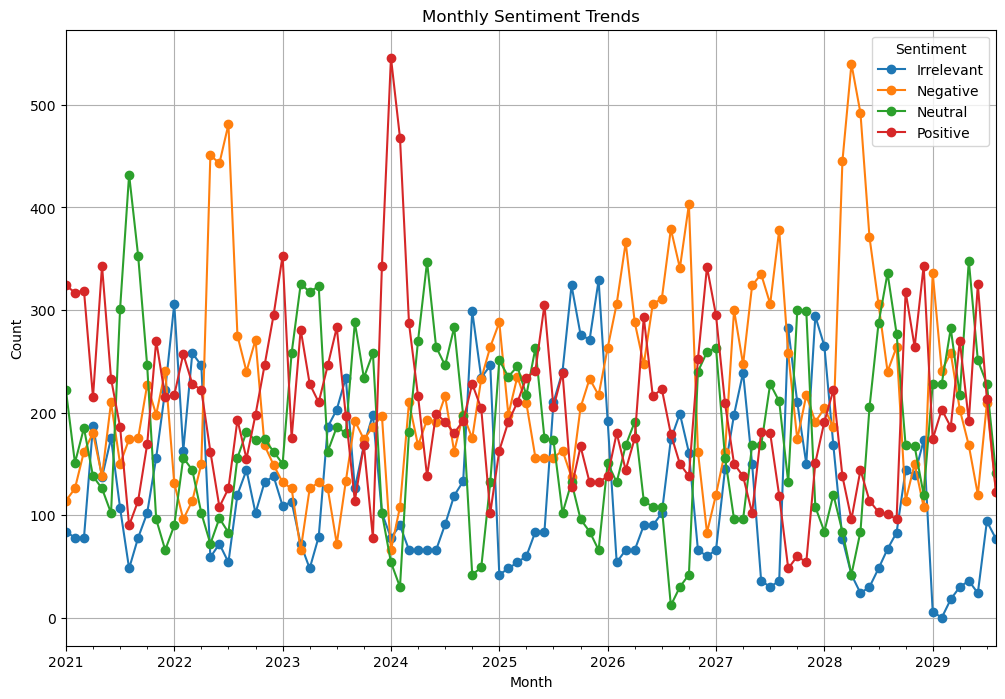

In [9]:
# Plotting the monthly sentiment trends
plt.figure(figsize=(12, 8))
monthly_sentiment.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Monthly Sentiment Trends')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()

In [10]:
# Mock data to mimic the structure of the CSV files
data = {
    'tweet_id': np.arange(100),
    'platform': np.random.choice(['Twitter', 'Facebook'], 100),
    'sentiment': np.random.choice(['positive', 'negative', 'neutral'], 100),
    'tweet_text': np.random.choice(['Sample tweet text']*100, 100),
    'tweet_created': pd.date_range(start='2021-01-01', periods=100, freq='D')
}

In [11]:
combined_data = pd.DataFrame(data)

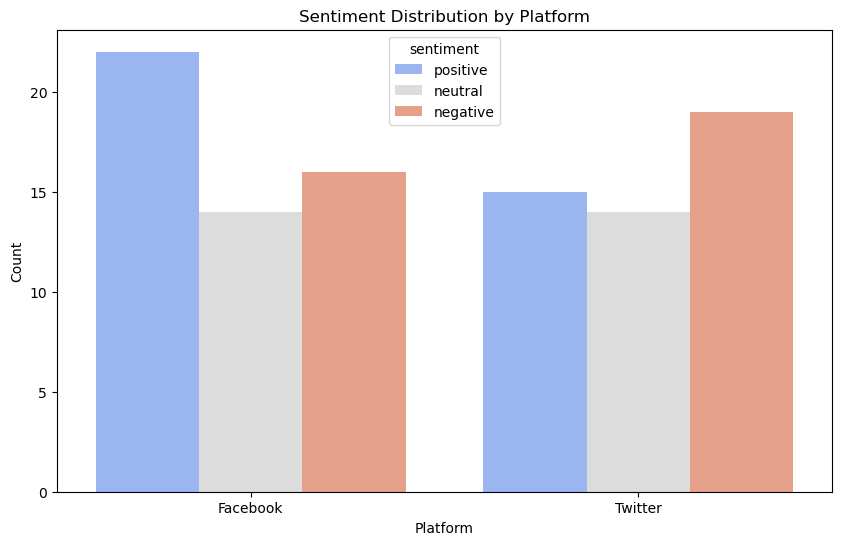

In [12]:

# Display the distribution of sentiments by platform
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='platform', hue='sentiment', palette='coolwarm')
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

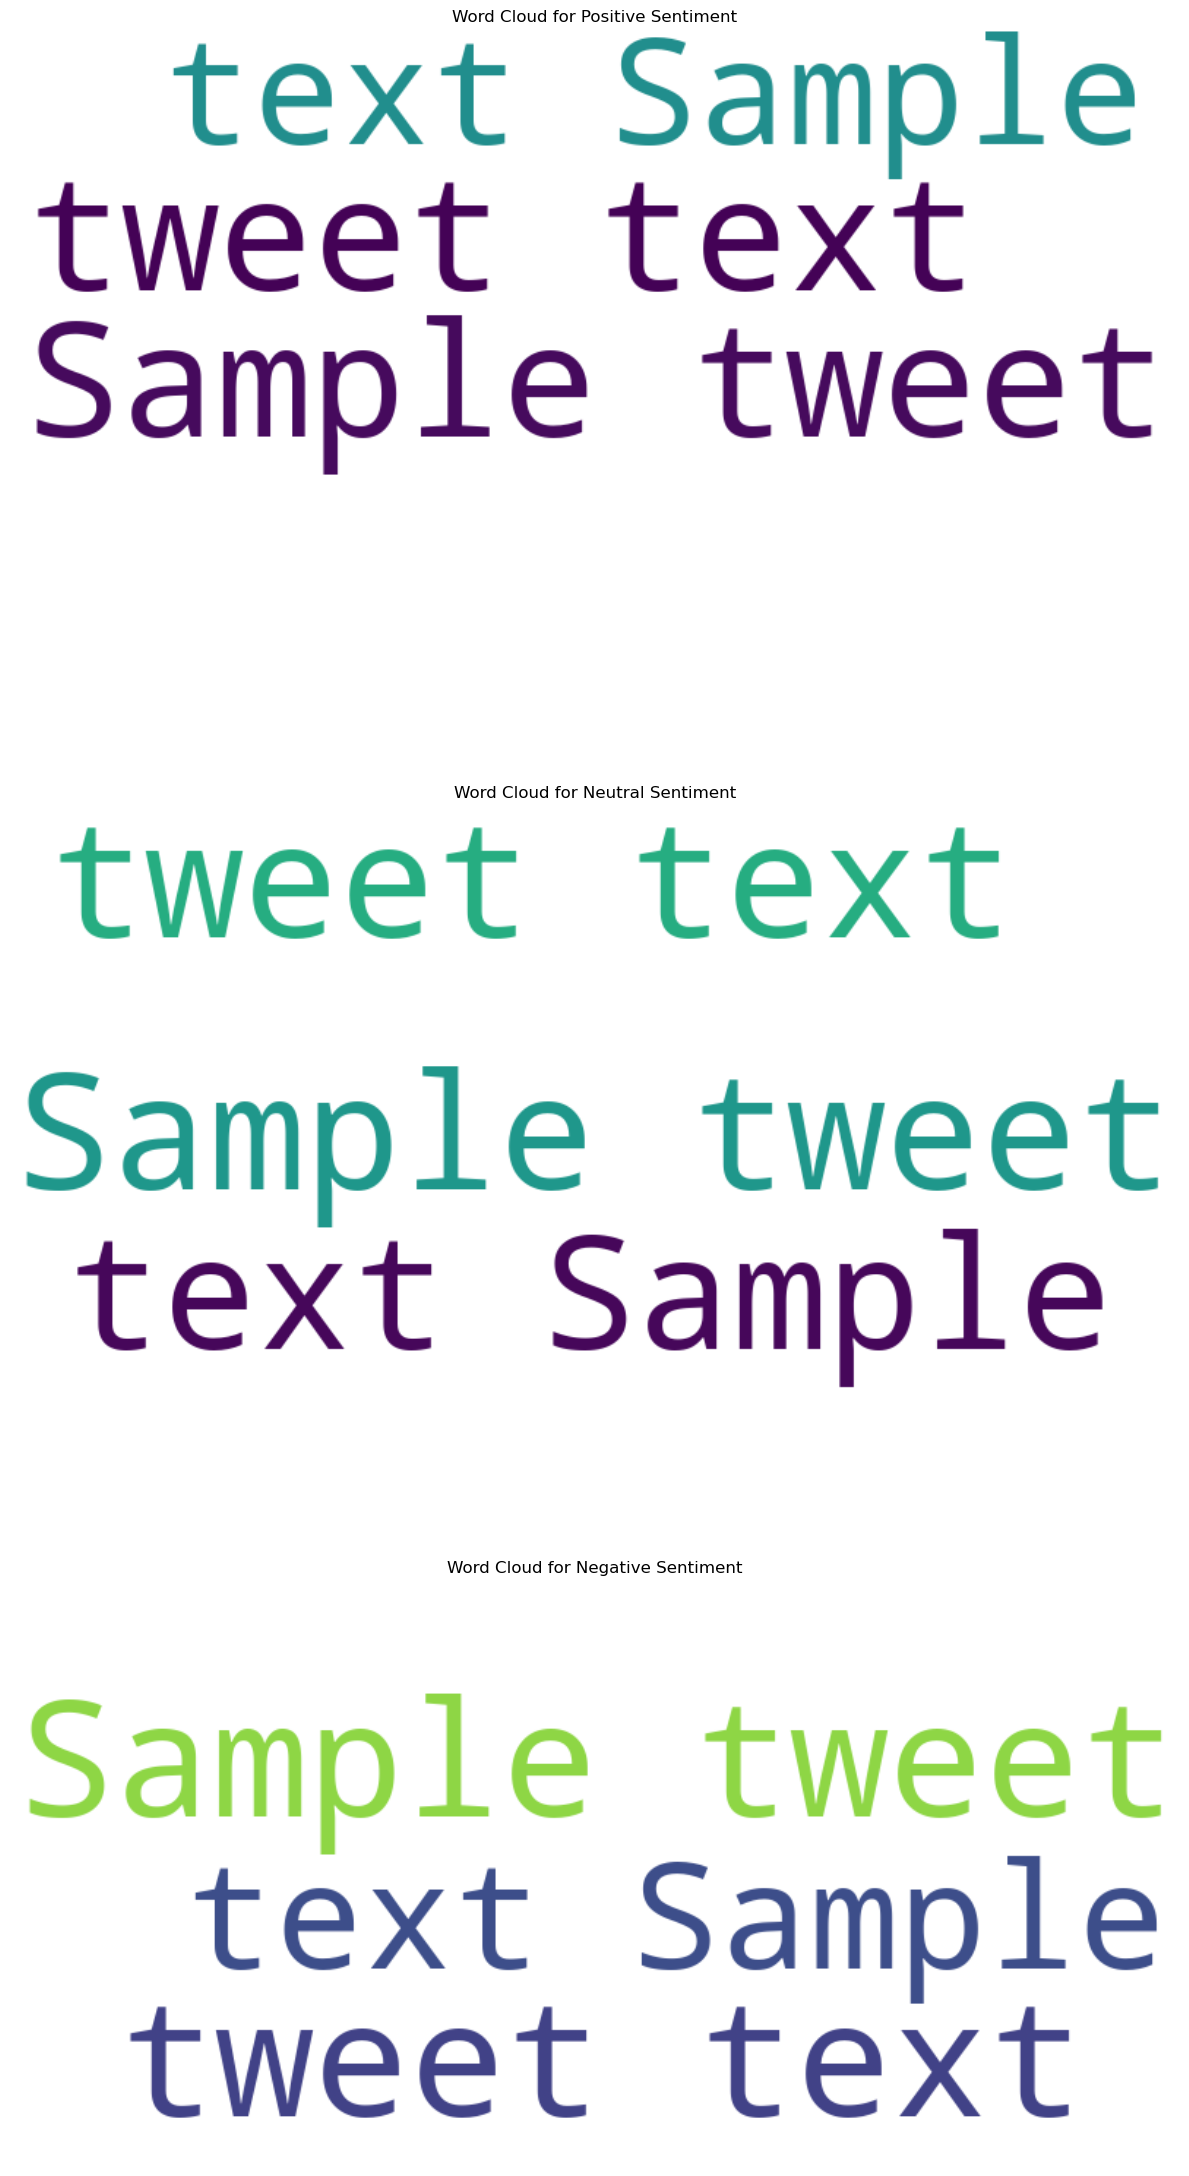

In [15]:
# Generate word clouds for each sentiment
sentiments = combined_data['sentiment'].unique()
fig, axes = plt.subplots(nrows=len(sentiments), ncols=1, figsize=(12, 8*len(sentiments)))

for i, sentiment in enumerate(sentiments):
    text = " ".join(combined_data[combined_data['sentiment'] == sentiment]['tweet_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    axes[i].axis('off')
plt.tight_layout()
plt.show()